In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df1=pd.read_csv("04.csv")
df2=pd.read_csv("06.csv")

In [ ]:
df1.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


In [ ]:
df2.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
df1.describe()

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000
mean,2347.000000,399.493953,4.364923,1.117998,4.332907,5.820864
std,1355.474087,124.556864,2.008215,1.080350,1.861792,1.552813
min,0.000000,61.040000,-2.425900,0.000000,0.000000,1.000000
25%,1173.500000,320.394000,3.042000,0.000000,3.000000,4.756219
50%,2347.000000,388.512000,4.245800,1.000000,4.000000,5.648590
75%,3520.500000,460.530000,5.450250,2.000000,5.000000,6.903090
max,4694.000000,1151.423000,14.520300,10.000000,16.000000,11.221849


In [ ]:
df1.isna().sum()

Unnamed: 0            0
molecule_chembl_id    0
canonical_smiles      0
class                 0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


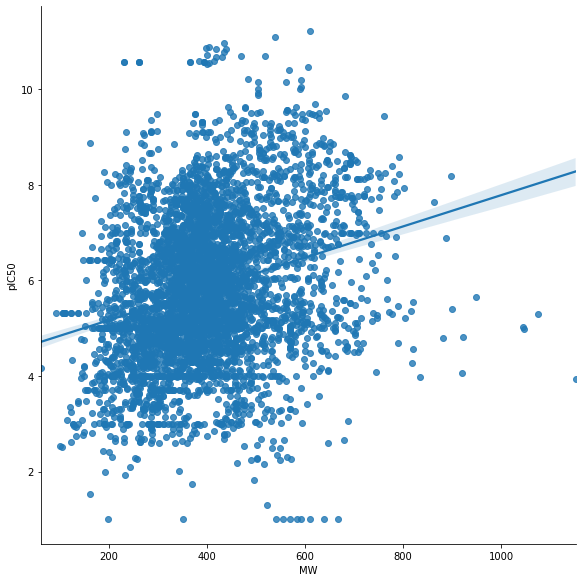

In [ ]:
sns.lmplot('MW','pIC50',data=df1,size=8)

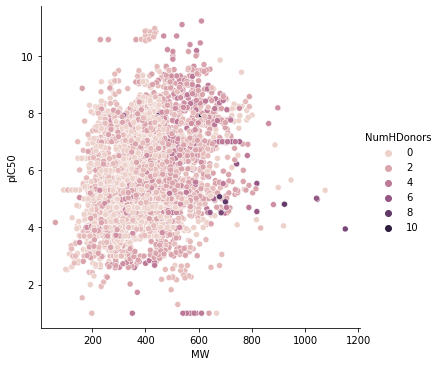

In [ ]:
sns.relplot(x="MW", y="pIC50", hue="NumHDonors", data=df1);

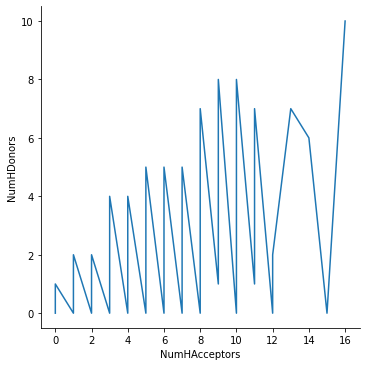

In [ ]:
sns.relplot(x="NumHAcceptors", y="NumHDonors",estimator=None,data=df1,kind="line") #estimators=noenn hata k bhi dekh skta hai.

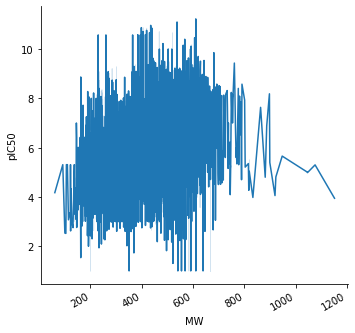

In [ ]:
g = sns.relplot(x="MW", y="pIC50", kind="line", data=df1)
g.fig.autofmt_xdate()

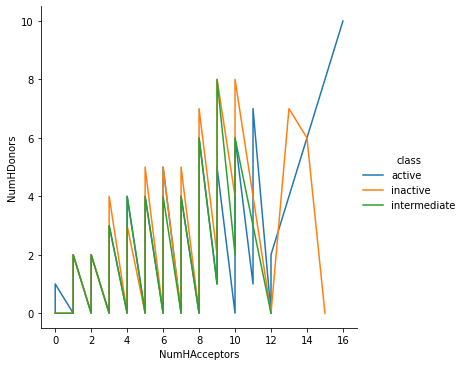

In [ ]:
sns.relplot(x="NumHAcceptors", y="NumHDonors",estimator=None,data=df1,kind="line", hue="class") 

In [ ]:
sns.set_theme(style='darkgrid')

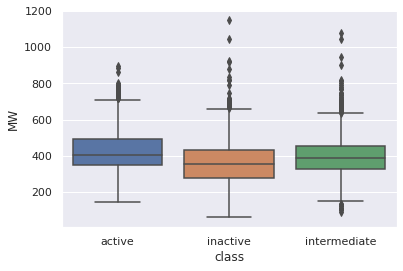

In [ ]:
sns.boxplot(x="class", y="MW", data=df1)


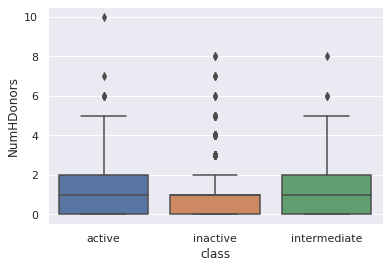

In [ ]:
sns.boxplot(x="class", y="NumHDonors", data=df1)


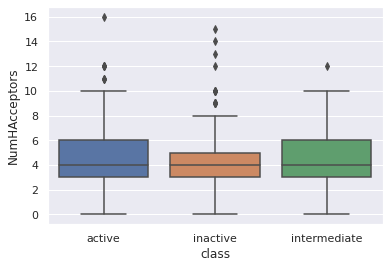

In [ ]:
sns.boxplot(x="class", y="NumHAcceptors", data=df1)


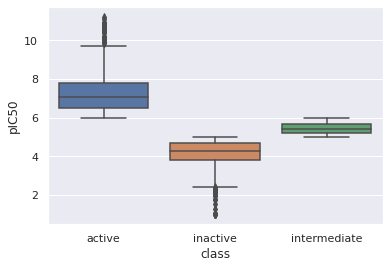

In [ ]:
sns.boxplot(x="class", y="pIC50", data=df1)


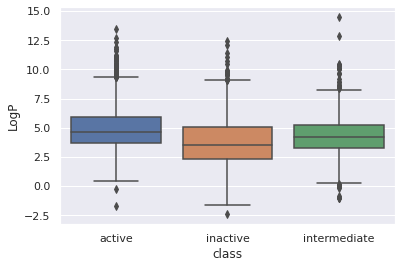

In [ ]:
sns.boxplot(x="class", y="LogP", data=df1)


In [ ]:
corr = df1.corr()


In [ ]:
corr

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
Unnamed: 0,1.000000,0.181517,0.069725,0.116536,0.122209,-0.068617
MW,0.181517,1.000000,0.762743,0.315359,0.581890,0.262300
LogP,0.069725,0.762743,1.000000,0.053955,0.144730,0.301160
NumHDonors,0.116536,0.315359,0.053955,1.000000,0.381358,0.092540
NumHAcceptors,0.122209,0.581890,0.144730,0.381358,1.000000,0.061329
pIC50,-0.068617,0.262300,0.301160,0.092540,0.061329,1.000000


In [ ]:
df1=df1.drop(["Unnamed: 0"],axis=1)

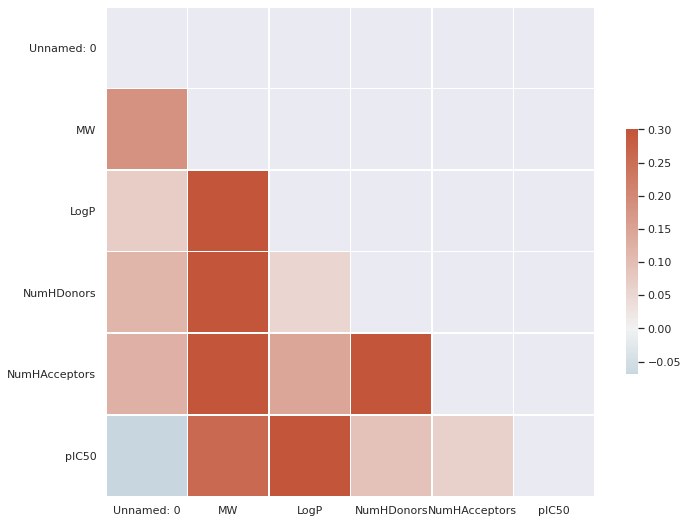

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df1=df1.drop(["LogP","canonical_smiles","molecule_chembl_id"],axis=1)

In [ ]:
df1.head()

,class,MW,NumHDonors,NumHAcceptors,pIC50
0,active,312.325,0.0,6.0,6.124939
1,active,376.913,0.0,5.0,7.000000
2,inactive,426.851,0.0,5.0,4.301030
3,active,404.845,0.0,5.0,6.522879
4,active,346.334,0.0,6.0,6.096910


In [ ]:
df1['class'] = pd.factorize(df1['class'])[0] + 1 # class ko numeric bana diya


In [ ]:
df1.head()

,class,MW,NumHDonors,NumHAcceptors,pIC50
0,1,312.325,0.0,6.0,6.124939
1,1,376.913,0.0,5.0,7.000000
2,2,426.851,0.0,5.0,4.301030
3,1,404.845,0.0,5.0,6.522879
4,1,346.334,0.0,6.0,6.096910


In [ ]:
y=df1["class"]
x=df1.drop(["class"],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([1, 2, 3, 2, 3, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1,
       2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1,
       2, 1, 3, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1,
       2, 3, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 2, 1,
       1, 2, 3, 1, 1, 2, 3, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 3,
       2, 2, 1, 3, 1, 1, 1, 2, 3, 2, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 2, 3,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1,
       2, 2, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 3, 2,
       1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1,
       1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 3, 3, 2, 2, 1, 1, 3, 2, 3, 2, 1,
       1, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2,
       3, 1, 2, 1, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1,

In [ ]:
y_test

1554    1
1827    2
3463    3
4156    2
2581    3
       ..
990     1
2069    1
2908    3
1730    3
1538    1
Name: class, Length: 939, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df2.shape

(5043, 882)

In [ ]:
Y=df2["pIC50"]
X=df2.drop(["pIC50"],axis=1)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)

In [ ]:
y_train.shape

(4034,)

In [ ]:
y_train = np.array(y_train)

In [ ]:
y_val=np.array(y_val)

In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(x_val))
xval_scale=scaler_x.transform(x_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(881, input_dim=881, kernel_initializer='normal', activation='relu'))
  model.add(Dense(2670, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.summary()
	# Compile model
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
  predictions = model.predict(xval_scale)	
  return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x_train,y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 881)               777042    
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              2354940   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 3,134,653
Trainable params: 3,134,653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
22/22 [==============================] - 3s 94ms/step - loss: 3.7733 - mse: 3.7733 - mae: 1.1424 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1095
Epoch 2/30
22/22 [==============================] - 2s 89ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1086 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.1003
Epoch 3/30
22/22 [==============================] 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


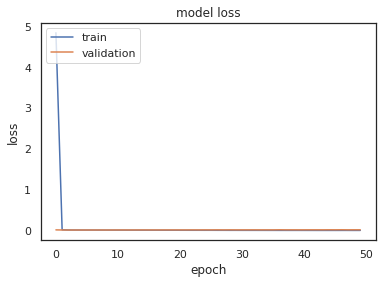

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(results, open(filename, 'wb'))
from google.colab import files
files.download('finalized_model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
  model = Sequential()
  model.add(Dense(881, input_dim=881, kernel_initializer='normal', activation='relu'))
  model.add(Dense(2670, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.summary()
	# Compile model
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=150, verbose=1, validation_split=0.2)
  predictions = model.predict(xval_scale)	

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 881)               777042    
_________________________________________________________________
dense_40 (Dense)             (None, 2670)              2354940   
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 2671      
Total params: 3,134,653
Trainable params: 3,134,653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [==============================] - 61s 81ms/step - loss: 4.8431 - mse: 4.8431 - mae: 1.2562 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1081
Epoch 2/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1119 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0982
Epoch 3/50
22/22 [============================

In [ ]:
import pickle
filename = 'keras_regressor_model2.sav'
pickle.dump(results, open(filename, 'wb'))
from google.colab import files
files.download('keras_regressor_model2.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


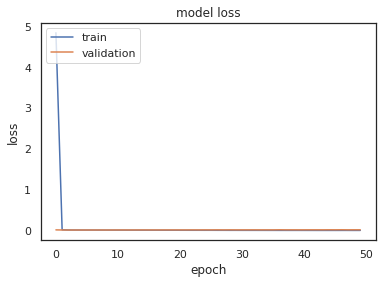

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

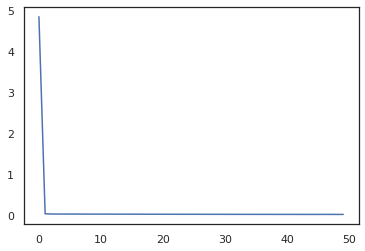

In [ ]:
plt.plot(history.history['mse'])
plt.show()

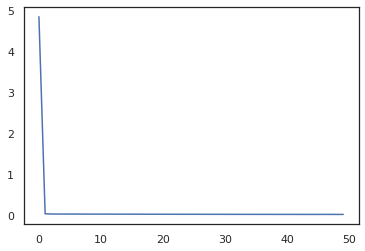

In [ ]:
plt.plot(history.history['loss'])
plt.show()

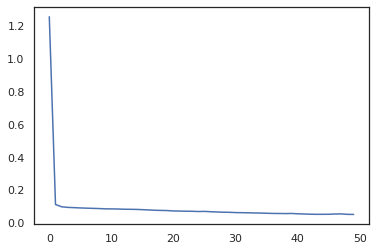

In [ ]:

plt.plot(history.history['mae'])
plt.show()

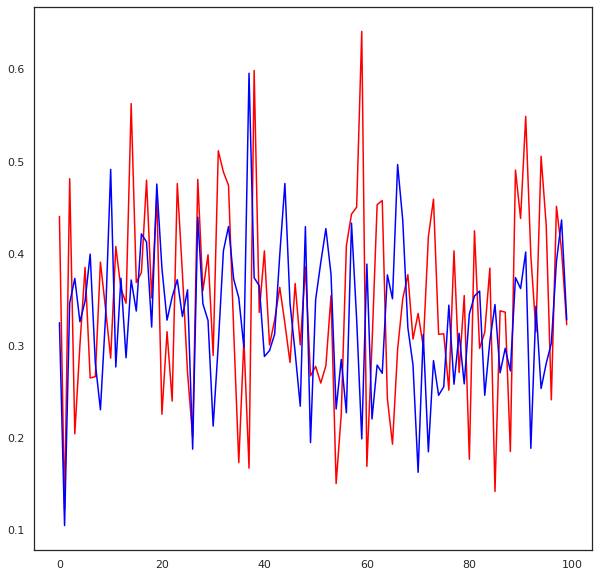

In [ ]:
plt.figure(figsize=(10,10)) 

plt.plot(yval_scale[100:200], color = 'red', label = 'Real data')
plt.plot(predictions[100:200], color = 'blue', label = 'Predicted data')
plt.show()
  



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

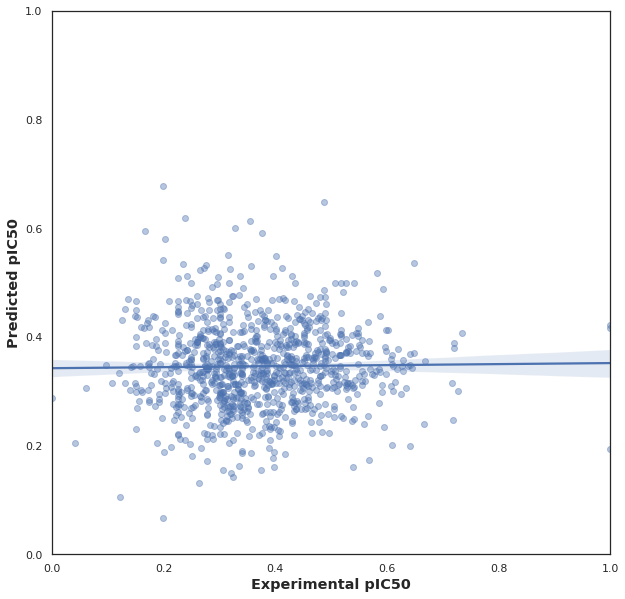

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(yval_scale, predictions, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.figure.set_size_inches(10,10)
plt.show